# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [74]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [75]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [77]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.024428             0.004782   
CustomerAge                  -0.024428     1.000000            -0.009852   
TransactionDuration           0.004782    -0.009852             1.000000   
LoginAttempts                -0.007397     0.007876             0.030076   
AccountBalance               -0.026310     0.321161             0.006859   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.007397       -0.026310  
CustomerAge               0.007876        0.321161  
TransactionDuration       0.030076        0.006859  
LoginAttempts             1.000000        0.009088  
AccountBalance            0.009088        1.000000  


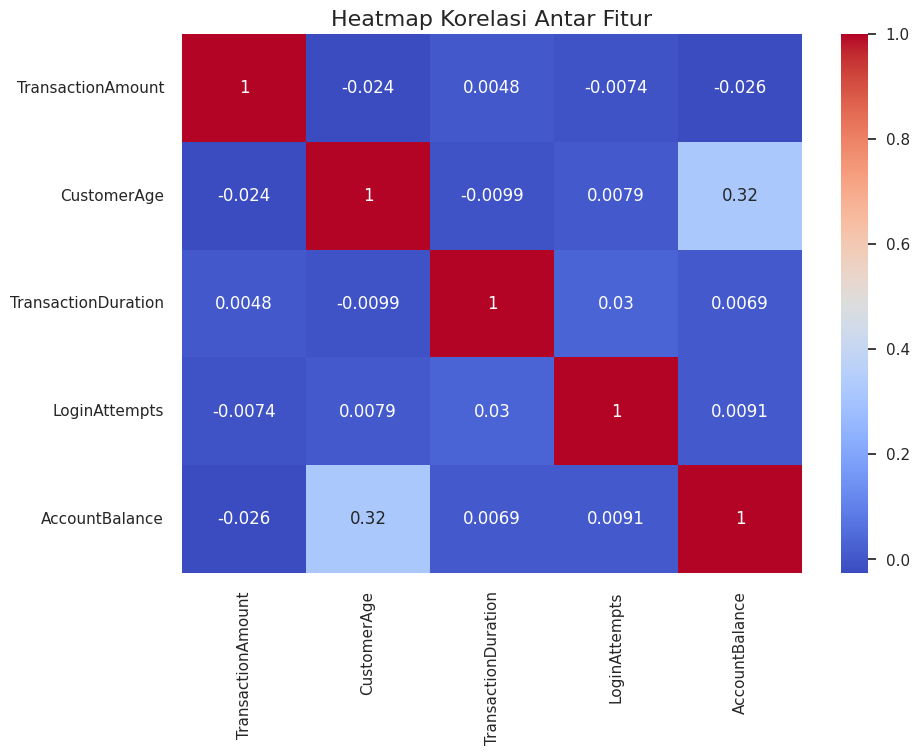

In [78]:
# Menghitung matriks korelasi untuk kolom numerik
correlation_matrix = df.corr(numeric_only=True)


# Menampilkan matriks korelasi
print(correlation_matrix)

# Membuat heatmap untuk visualisasi
plt.figure(figsize=(10, 7))

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
)

plt.title('Heatmap Korelasi Antar Fitur', fontsize=16)
plt.show()

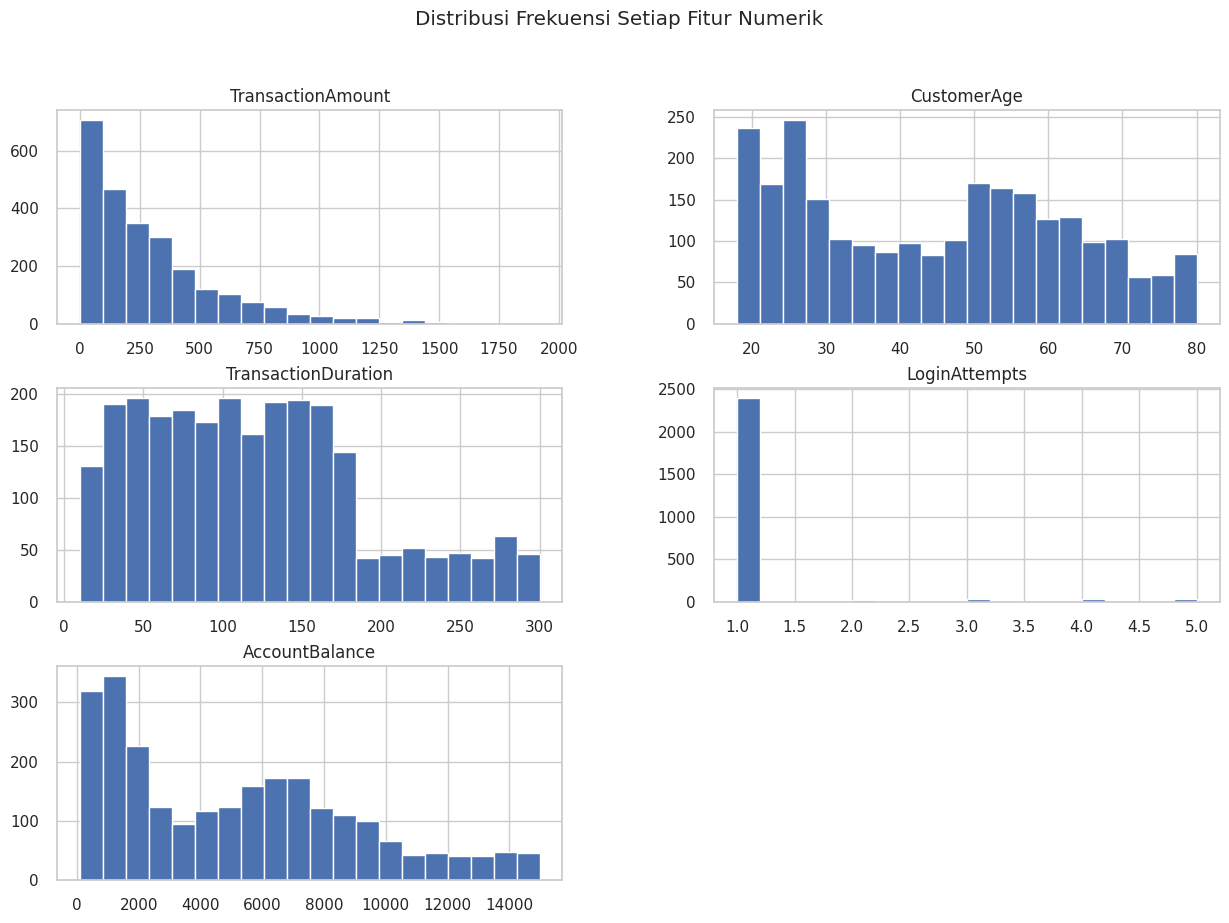

In [79]:
# Membuat histogram untuk semua kolom numerik dalam DataFrame
df.hist(bins=20, figsize=(15, 10))

# Menambahkan judul utama untuk semua plot
plt.suptitle('Distribusi Frekuensi Setiap Fitur Numerik')

# Menampilkan plot
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

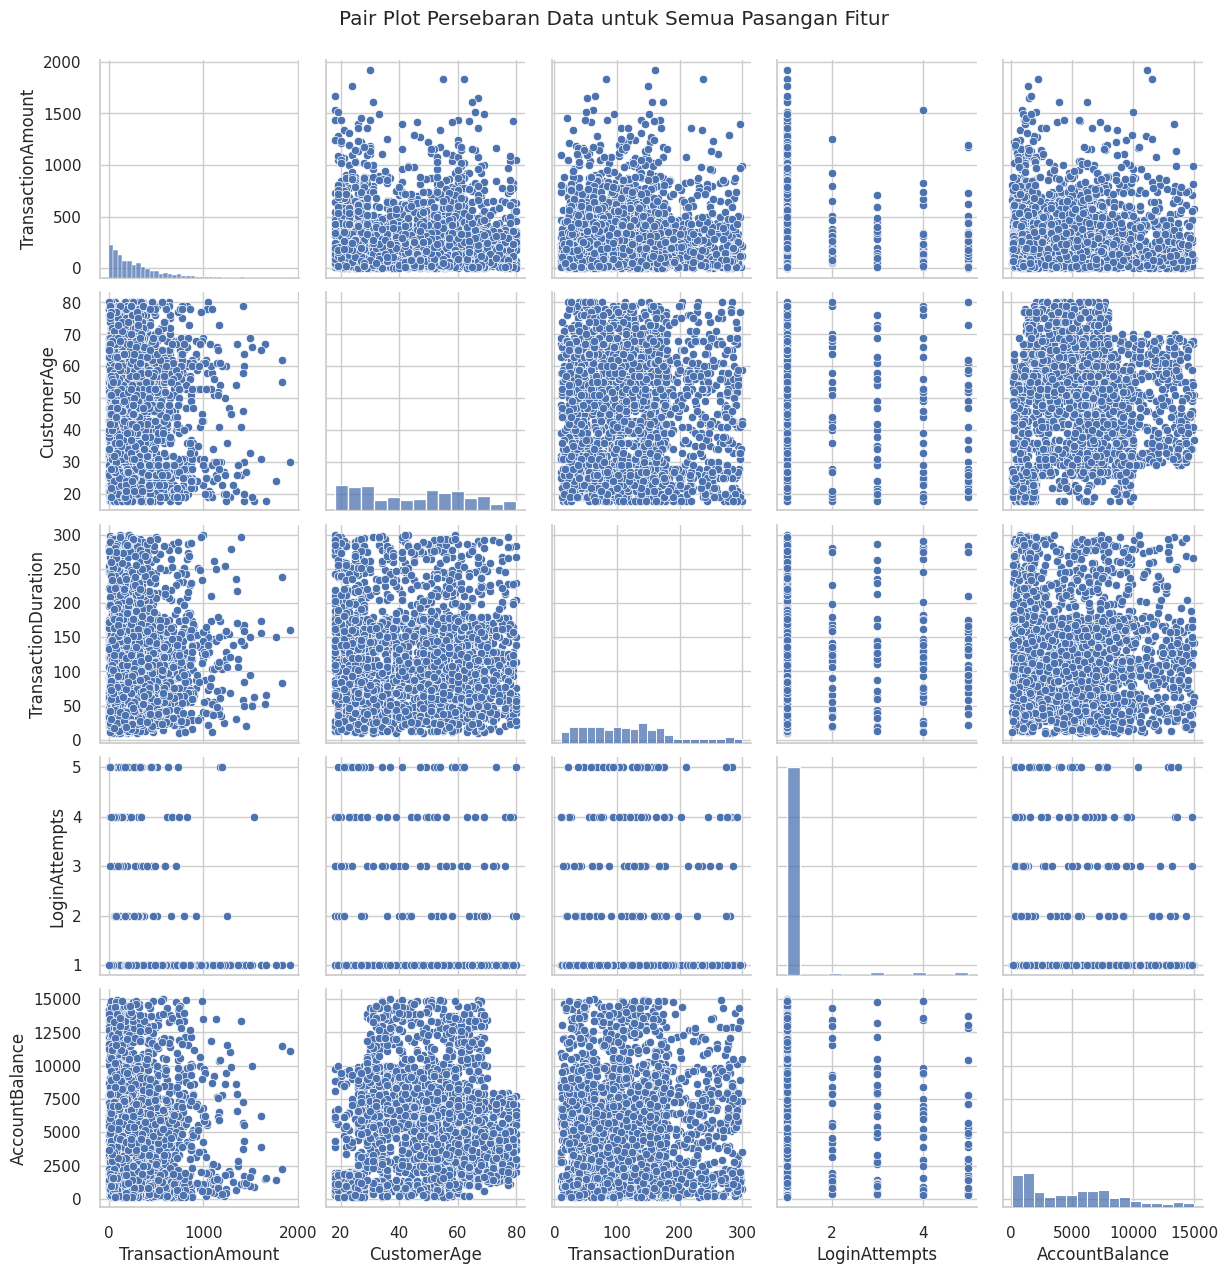

In [80]:
# Membuat pair plot untuk melihat setiap kemungkinan pasangan fitur yang ada di dalam data
sns.pairplot(df)

plt.suptitle('Pair Plot Persebaran Data untuk Semua Pasangan Fitur', y=1.02)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [81]:
# Melihat apakah ada nilai yang kosong pada dataset
missing_values = df.isnull().sum()

print("Jumlah nilai yang hilang (missing values) per kolom:")
print(missing_values[missing_values > 0])

Jumlah nilai yang hilang (missing values) per kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [82]:
jumlah_duplikat = df.duplicated().sum()

# Menampilkan hasilnya
print(f"baris data yang terduplikasi dalam dataset : {jumlah_duplikat}")

baris data yang terduplikasi dalam dataset : 21


In [83]:
# Pilih kolom numerik untuk di-scaling
numeric_cols = [
    'TransactionAmount',
    'TransactionDuration',
    'AccountBalance'
]

# Buat objek StandardScaler
scaler = StandardScaler()

# Lakukan fit_transform pada kolom numerik
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Tampilkan 5 baris pertama dari data yang sudah di-scaling
print("Data setelah di-scaling menggunakan StandardScaler:")
print(df_scaled.head())

Data setelah di-scaling menggunakan StandardScaler:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.970546  2023-04-11 16:29:14   
1      TX000002   AC00455           0.268963  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586526  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387294  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.972736  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0  

In [84]:
# menentukan daftar kolom yang akan dihapus
columns_to_drop = [
    'TransactionID',
    'AccountID',
    'DeviceID',
    'IP Address',
    'MerchantID',
    'LoginAttempts'
]

# drop kolom
df_cleaned = df_scaled.drop(columns=columns_to_drop, axis=1)

# checking 5 baris pertama dari DataFrame yang sudah bersih
print("DataFrame after drop columns:")
print(df_cleaned.head())

DataFrame after drop columns:
   TransactionAmount      TransactionDate TransactionType   Location Channel  \
0          -0.970546  2023-04-11 16:29:14           Debit  San Diego     ATM   
1           0.268963  2023-06-27 16:44:19           Debit    Houston     ATM   
2          -0.586526  2023-07-10 18:16:08           Debit       Mesa  Online   
3          -0.387294  2023-05-05 16:32:11           Debit    Raleigh  Online   
4          -0.972736  2023-10-16 17:51:24          Credit    Atlanta  Online   

   CustomerAge CustomerOccupation  TransactionDuration  AccountBalance  \
0         70.0             Doctor            -0.548393       -0.000315   
1         68.0             Doctor             0.307960        2.218381   
2         19.0            Student            -0.905207       -1.024091   
3         26.0            Student            -1.347656        0.886694   
4          NaN            Student             1.121495        0.594263   

  PreviousTransactionDate  
0     2024-11-04

In [85]:
# Buat salinan DataFrame cleaned
df_encoded = df_cleaned.copy()

# Buat objek LabelEncoder
label_encoder = LabelEncoder()

# kita akan mencari setiap column yang bertipe "object/kategorik" untuk dijadikan numeric
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# checking 5 baris pertama dari DataFrame yang sudah diberi label
print("Data setelah feature encoding menggunakan LabelEncoder:")
print(df_encoded.head())

Data setelah feature encoding menggunakan LabelEncoder:
   TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0          -0.970546              680                1        36        0   
1           0.268963             1178                1        15        0   
2          -0.586526             1262                1        23        2   
3          -0.387294              818                1        33        2   
4          -0.972736             1939                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  AccountBalance  \
0         70.0                   0            -0.548393       -0.000315   
1         68.0                   0             0.307960        2.218381   
2         19.0                   3            -0.905207       -1.024091   
3         26.0                   3            -1.347656        0.886694   
4          NaN                   3             1.121495        0.594263   

   PreviousTransactionDate  
0

In [86]:
# selanjutnya kita gunakan columns.tolist() untuk checking seluruh fitur yang ada.
df_encoded.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [87]:
# Kita akan mengisi nilai yang hilang dengan median agar tidak membuang banyak data
for column in df_encoded.columns:

    # untuk kolom numerik
    if df_encoded[column].dtype == 'int64' or df_encoded[column].dtype == 'float64':
        median_value = df_encoded[column].median()
        df_encoded[column] = df_encoded[column].fillna(median_value)

    # untuk column kategorikal kita akan menggunakan mode/modus
    else:
        mode_value = df_encoded[column].mode()[0]
        df_encoded[column].fillna(mode_value, inplace=True)

# Verifikasi bahwa sudah tidak ada lagi data yang hilang
print(f"Jumlah total nilai yang hilang setelah diisi: \n{df_encoded.isnull().sum()}")

Jumlah total nilai yang hilang setelah diisi: 
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [88]:
print(f"Jumlah baris sebelum menghapus duplikat: {len(df_encoded)}")

# Menghapus baris duplikat
df_encoded.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df_encoded)}")

Jumlah baris sebelum menghapus duplikat: 2537
Jumlah baris setelah menghapus duplikat: 2514


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**


Kolom 'TransactionAmount' memiliki 113 outlier.


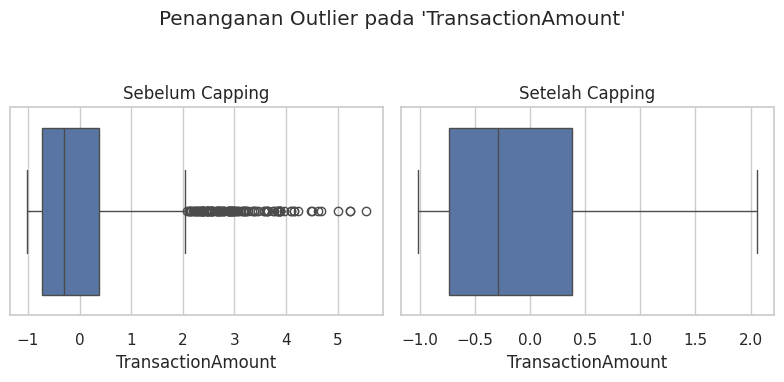

In [89]:
"""
teori ala ala :
Capping hanya dilakukan pada kolom numerik asli (seperti 'TransactionAmount')
karena outlier di sini adalah nilai ekstrem yang nyata dan dapat mengganggu model.

Kolom lain yang merupakan hasil encoding dari data kategorikal (seperti
'TransactionType') tidak di-capping. Angka pada kolom ini hanyalah label,
bukan nilai matematis, sehingga metode outlier tidak berlaku. Kolom-kolom ini
dibiarkan apa adanya.
"""

# Tentukan kolom numerik yang akan di-capping
kolom_untuk_capping = [
    'TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance'
]

# Buat salinan DataFrame
df_capped = df_encoded.copy()

# checking kolom yang telah ditentukan (ada outlier/tidak)
for column in kolom_untuk_capping:
    Q1 = df_encoded[column].quantile(0.25)
    Q3 = df_encoded[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    jumlah_outlier = len(df_encoded[(df_encoded[column] < lower_bound) | (df_encoded[column] > upper_bound)])

    if jumlah_outlier > 0:
        print(f"\nKolom '{column}' memiliki {jumlah_outlier} outlier.")

        # Visualisasi perbandingan (Before vs After)
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        sns.set_theme(style="whitegrid")

        sns.boxplot(ax=axes[0], x=df_encoded[column]).set_title("Sebelum Capping")

        # Terapkan capping
        df_capped[column] = np.where(df_capped[column] > upper_bound, upper_bound, df_capped[column])
        df_capped[column] = np.where(df_capped[column] < lower_bound, lower_bound, df_capped[column])

        sns.boxplot(ax=axes[1], x=df_capped[column]).set_title("Setelah Capping")

        plt.suptitle(f"Penanganan Outlier pada '{column}'")
        plt.tight_layout(rect=[0, 0.03, 1, 0.93])
        plt.show()

In [90]:
df_binned = df_capped.copy()

# Melakukan Proses Binning pada Kolom 'CustomerAge' dengan range berikut : Muda (0-30)', 'Dewasa (31-45)', 'Paruh Baya (46-60)', 'Senior (60+)
age_bins = [0, 30, 45, 60, np.inf]
age_labels = ['Muda (0-30)', 'Dewasa (31-45)', 'Paruh Baya (46-60)', 'Senior (60+)']

# Menerapkan binning menggunakan pd.cut
df_binned['AgeGroup'] = pd.cut(df_binned['CustomerAge'], bins=age_bins, labels=age_labels, right=False)


# Binning pada Kolom 'TransactionAmount'dengan range berikut :'Transaksi Kecil', 'Transaksi Sedang', 'Transaksi Besar'
amount_labels = ['Transaksi Kecil', 'Transaksi Sedang', 'Transaksi Besar']

# Menerapkan binning menggunakan pd.qcut
df_binned['TransactionAmountGroup'] = pd.qcut(df_binned['TransactionAmount'], q=3, labels=amount_labels)

# Encoding Hasil Binning Menggunakan LabelEncoder
label_encoder = LabelEncoder()

# Encode kolom 'AgeGroup' dan 'TransactionAmountGroup'
df_binned['AgeGroup_Encoded'] = label_encoder.fit_transform(df_binned['AgeGroup'])
df_binned['TransactionAmountGroup_Encoded'] = label_encoder.fit_transform(df_binned['TransactionAmountGroup'])


print("--- Hasil setelah Binning dan Encoding ---")
# Menampilkan beberapa kolom relevan untuk melihat perubahannya
print(df_binned[[
    'CustomerAge', 'AgeGroup', 'AgeGroup_Encoded',
    'TransactionAmount', 'TransactionAmountGroup', 'TransactionAmountGroup_Encoded'
]].head())

print("\n--- Distribusi Grup Umur ---")
print(df_binned['AgeGroup'].value_counts())

print("\n--- Distribusi Grup Jumlah Transaksi ---")
print(df_binned['TransactionAmountGroup'].value_counts())

--- Hasil setelah Binning dan Encoding ---
   CustomerAge            AgeGroup  AgeGroup_Encoded  TransactionAmount  \
0         70.0        Senior (60+)                 3          -0.970546   
1         68.0        Senior (60+)                 3           0.268963   
2         19.0         Muda (0-30)                 1          -0.586526   
3         26.0         Muda (0-30)                 1          -0.387294   
4         45.0  Paruh Baya (46-60)                 2          -0.972736   

  TransactionAmountGroup  TransactionAmountGroup_Encoded  
0        Transaksi Kecil                               1  
1        Transaksi Besar                               0  
2       Transaksi Sedang                               2  
3       Transaksi Sedang                               2  
4        Transaksi Kecil                               1  

--- Distribusi Grup Umur ---
AgeGroup
Muda (0-30)           757
Paruh Baya (46-60)    672
Senior (60+)          607
Dewasa (31-45)        478
Name: cou

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [91]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_binned.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,PreviousTransactionDate,AgeGroup_Encoded,TransactionAmountGroup_Encoded
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
mean,-0.048151,1256.328958,0.787987,21.284010,1.01074,44.623707,1.530231,0.000702,-0.000193,180.889021,1.560064,1.000000
std,0.854233,725.581982,0.437042,12.397534,0.83084,17.741725,1.150477,0.994014,0.995102,103.956287,1.053565,0.816659
min,-1.017881,0.000000,0.000000,0.000000,0.00000,18.000000,0.000000,-1.561745,-1.286100,0.000000,0.000000,0.000000
25%,-0.734076,628.250000,1.000000,11.000000,0.00000,27.000000,0.250000,-0.805299,-0.922221,91.250000,1.000000,0.000000
50%,-0.295362,1256.500000,1.000000,21.000000,1.00000,45.000000,2.000000,-0.105944,-0.097334,181.000000,2.000000,1.000000
75%,0.383159,1884.750000,1.000000,32.000000,2.00000,59.000000,3.000000,0.593411,0.648772,272.000000,2.000000,2.000000
max,2.059012,2485.000000,2.000000,43.000000,3.00000,80.000000,4.000000,2.577295,2.531190,360.000000,3.000000,2.000000


In [92]:
# inverse dataset yang sudah diencode ke kategori aslinya.
categorical_cols = [
    'TransactionType',
    'Location',
    'Channel',
    'CustomerOccupation'
]
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(df_binned[col])
    encoders[col] = le

df_final_inversed = df_binned.copy()

for col in categorical_cols:
    encoder_for_col = encoders[col]
    df_final_inversed[col] = encoder_for_col.inverse_transform(df_binned[col])

df_final_inversed.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,PreviousTransactionDate,AgeGroup,TransactionAmountGroup,AgeGroup_Encoded,TransactionAmountGroup_Encoded
0,-0.970546,680,1,36,0,70.0,0,-0.548393,-0.000315,105,Senior (60+),Transaksi Kecil,3,1
1,0.268963,1178,1,15,0,68.0,0,0.307960,2.218381,192,Senior (60+),Transaksi Besar,3,0
2,-0.586526,1262,1,23,2,19.0,3,-0.905207,-1.024091,41,Muda (0-30),Transaksi Sedang,1,2
3,-0.387294,818,1,33,2,26.0,3,-1.347656,0.886694,163,Muda (0-30),Transaksi Sedang,1,2
4,-0.972736,1939,0,1,2,45.0,3,1.121495,0.594263,16,Paruh Baya (46-60),Transaksi Kecil,2,1


DataFrame yang siap untuk di clustering:
['TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'TransactionDuration', 'AccountBalance', 'PreviousTransactionDate', 'AgeGroup_Encoded', 'TransactionAmountGroup_Encoded']


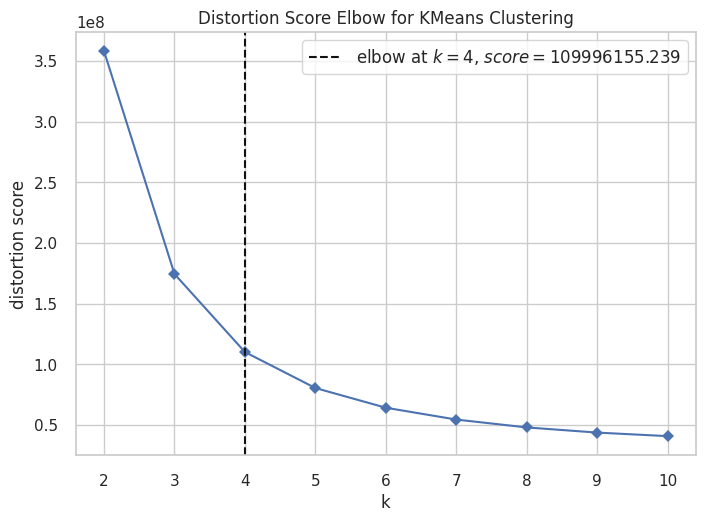

Nilai k optimal yang disarankan oleh Elbow Method adalah: 4


In [93]:
df_final = df_binned.drop(columns=[
    'CustomerAge',
    'TransactionAmount',
    'AgeGroup',
    'TransactionAmountGroup'
])

print("DataFrame yang siap untuk di clustering:")
print(df_final.columns.tolist())

# Buat Model dan Visualizer
model = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(
    model,
    k=(2,11),
    metric='distortion',
    timings=False
)

visualizer.fit(df_final)
visualizer.show()

# mencari nilai k optimal secara programmatic
optimal_k = visualizer.elbow_value_
print(f"Nilai k optimal yang disarankan oleh Elbow Method adalah: {optimal_k}")

In [94]:
# membuat model K-Means final dengan jumlah cluster yang optimal
kmeans_final = KMeans(
    n_clusters=optimal_k,
    n_init=10,
    random_state=42
)

# training model dan prediksi cluster
cluster_labels = kmeans_final.fit_predict(df_final)

df_binned['Cluster'] = cluster_labels

# hasil
print(f"\nBerhasil membuat {optimal_k} cluster, Berikut hasilnya:")
print(df_binned[['TransactionDate','PreviousTransactionDate','CustomerAge', 'TransactionAmount', 'CustomerOccupation', 'Cluster']].head())

print(f"\nDistribusi data :")
print(df_binned['Cluster'].value_counts())


Berhasil membuat 4 cluster, Berikut hasilnya:
   TransactionDate  PreviousTransactionDate  CustomerAge  TransactionAmount  \
0              680                      105         70.0          -0.970546   
1             1178                      192         68.0           0.268963   
2             1262                       41         19.0          -0.586526   
3              818                      163         26.0          -0.387294   
4             1939                       16         45.0          -0.972736   

   CustomerOccupation  Cluster  
0                   0        0  
1                   0        0  
2                   3        3  
3                   3        0  
4                   3        1  

Distribusi data :
Cluster
1    632
3    629
2    629
0    624
Name: count, dtype: int64


Jalankan cell code ini untuk menyimpan model kamu.

In [95]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans_final, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [96]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(df_final, cluster_labels)
print(f"Nilai Silhouette Score dari model adalah: {silhouette_avg}")

Nilai Silhouette Score dari model adalah: 0.4986490974035773


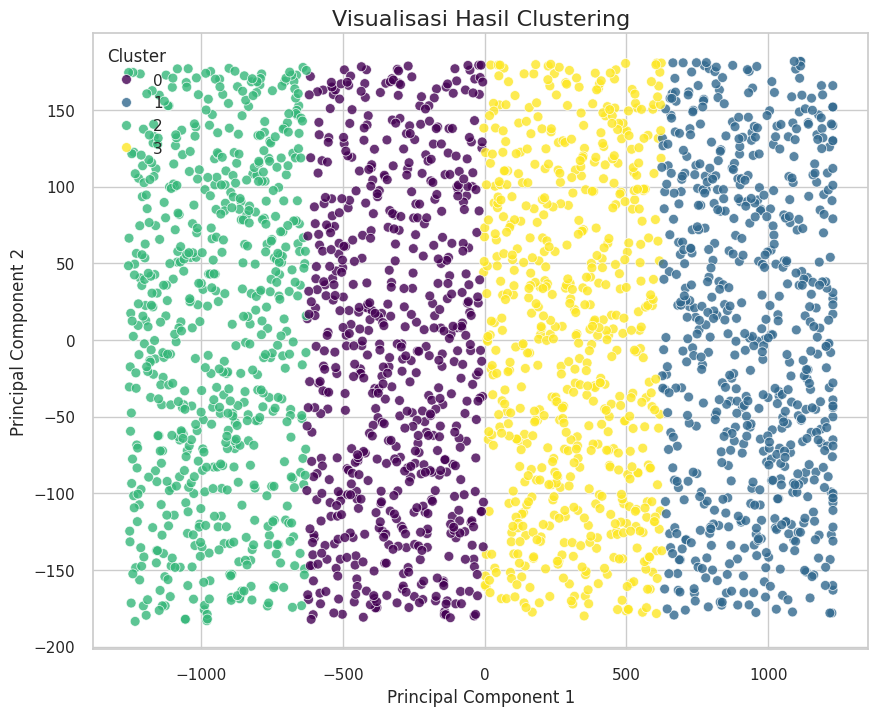

In [97]:
pca = PCA(n_components=2, random_state=42)
df_visualisasi = pca.fit_transform(df_final)

# Buat DataFrame dari hasil PCA
df_visualisasi = pd.DataFrame(df_visualisasi, columns=['PC1', 'PC2'])

# Tambahkan Label Cluster dari Model Anda
# 'cluster_labels' adalah hasil dari kmeans_final.fit_predict() sebelumnya
df_visualisasi['Cluster'] = cluster_labels


# Buat Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_visualisasi,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='viridis',
    alpha=0.8,
    s=50 # Ukuran titik
)

plt.title('Visualisasi Hasil Clustering', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [98]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(df_final)

# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
df_pca_final = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])

# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans_pca.fit(df_pca_final)

cluster_labels_pca = kmeans_pca.labels_

# Menghitung dan menampilkan nilai Silhouette Score
silhouette_avg_pca = silhouette_score(df_pca_final, cluster_labels_pca)

print(f"Nilai Silhouette Score dari model PCA adalah: {silhouette_avg_pca}")

Nilai Silhouette Score dari model PCA adalah: 0.49989962569221824


In [99]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [100]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

kolom_analisis = [
    'CustomerAge',
    'TransactionAmount',
    'TransactionDuration',
    'AccountBalance'
]

analisis_cluster = df_binned.groupby('Cluster')[kolom_analisis].agg(
    ['mean', 'std', 'min', 'max']
)

analisis_cluster['Jumlah Anggota'] = df_binned['Cluster'].value_counts()
print("--- Analisis Deskriptif untuk Setiap Cluster ---")
print(analisis_cluster)

--- Analisis Deskriptif untuk Setiap Cluster ---
        CustomerAge                        TransactionAmount            \
               mean        std   min   max              mean       std   
Cluster                                                                  
0         44.939103  18.048876  18.0  80.0         -0.090827  0.820896   
1         44.705696  17.526582  18.0  80.0         -0.061355  0.855848   
2         43.623211  17.433207  18.0  80.0         -0.050482  0.844816   
3         45.228935  17.954606  18.0  80.0          0.009785  0.892453   

                            TransactionDuration                                \
              min       max                mean       std       min       max   
Cluster                                                                         
0       -1.013945  2.059012           -0.001279  0.988854 -1.561745  2.548750   
1       -1.017881  2.059012            0.025128  1.017772 -1.561745  2.577295   
2       -1.015827  2.059012

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah Konservatif & Hemat):**
  - **Rata-rata (mean) TransactionAmount: -0.0908 (Paling rendah).** <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) AccountBalance: -0.0172 (Paling rendah).** <Sebelum inverse> <Setelah inverse>

  - **Analisis:** Cluster ini mewakili segmen nasabah yang paling konservatif atau hemat. Mereka ditandai dengan nilai transaksi dan saldo rata-rata yang paling rendah di antara semua kelompok. Ini menunjukkan profil nasabah yang mungkin menggunakan layanan perbankan untuk kebutuhan dasar dan tidak banyak melakukan transaksi bernilai besar.
---

2. **Cluster 1: (Nasabah Mapan & Cermat):**
  - **Rata-rata (mean) AccountBalance: 0.0247 (Paling tinggi).** <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) TransactionDuration: 0.0251 (Positif, transaksi lebih lama/cermat).** <Sebelum inverse> <Setelah inverse>

  - **Analisis:** Cluster ini adalah segmen nasabah paling bernilai dari sisi simpanan, dengan saldo rata-rata tertinggi. Durasi transaksi mereka yang cenderung lebih lama bisa mengindikasikan mereka lebih cermat dan terlibat dalam aktivitas yang lebih kompleks. Mereka adalah nasabah prioritas yang fokus pada pertumbuhan aset.
---

3. **Cluster 2: (Nasabah Efisien & Praktis):**
  - **Rata-rata (mean) TransactionDuration: -0.0424 (Paling rendah/paling cepat).** <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) AccountBalance: 0.0009 (Mendekati rata-rata).** <Sebelum inverse> <Setelah inverse>

  - **Analisis:** Ciri khas utama dari cluster ini adalah efisiensi. Mereka menyelesaikan transaksi dengan waktu tercepat, yang menunjukkan profil nasabah yang menghargai kecepatan dan kemudahan. Saldo akun mereka sangat mendekati rata-rata, menunjukkan stabilitas finansial tanpa menjadi penyimpan dana utama.
---

4. **Cluster 3: Nasabah Transaksi Aktif:**
  - **Rata-rata (mean) TransactionAmount: 0.0097 (Satu-satunya dengan rata-rata positif).** <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) AccountBalance: -0.0093 (Sedikit di bawah rata-rata).** <Sebelum inverse> <Setelah inverse>

  - **Analisis:** Cluster ini unik karena menjadi satu-satunya yang memiliki rata-rata nilai transaksi positif, menandakan mereka mungkin lebih sering bertransaksi atau dengan nominal yang sedikit lebih tinggi. Namun, saldo rata-rata mereka sedikit negatif, yang bisa berarti dana tersebut aktif berputar untuk transaksi.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [101]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
# 'cluster_labels_pca' adalah variabel berisi hasil prediksi dari model PCA
# Menambahkan kolom 'Cluster_PCA' yaitu kolom hasil clusteringnya
df_binned['Cluster_PCA'] = cluster_labels_pca

# ubah nama kolom 'Cluster_PCA' menjadi 'Target'
df_binned.rename(columns={'Cluster_PCA': 'Target'}, inplace=True)

# preview data
print(df_binned.head())

# Untuk verifikasi, tampilkan daftar kolom terakhir
print("\nDaftar Kolom Terakhir:")
print(df_binned.columns.tolist())

   TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0          -0.970546              680                1        36        0   
1           0.268963             1178                1        15        0   
2          -0.586526             1262                1        23        2   
3          -0.387294              818                1        33        2   
4          -0.972736             1939                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  AccountBalance  \
0         70.0                   0            -0.548393       -0.000315   
1         68.0                   0             0.307960        2.218381   
2         19.0                   3            -0.905207       -1.024091   
3         26.0                   3            -1.347656        0.886694   
4         45.0                   3             1.121495        0.594263   

   PreviousTransactionDate            AgeGroup TransactionAmountGroup  \
0            

In [102]:
# Simpan DataFrame yang sudah diperbarui ke dalam file CSV
df_binned.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [103]:
# inverse dataset ke rentang normal untuk numerikal
numerical_cols = [
    'TransactionAmount',
    'TransactionDuration',
    'AccountBalance'
]
df_inversed = df_binned.copy()

df_inversed[numerical_cols] = scaler.inverse_transform(df_inversed[numerical_cols])

# tampilkan dataset yang sudah di-inverse
df_inversed.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,PreviousTransactionDate,AgeGroup,TransactionAmountGroup,AgeGroup_Encoded,TransactionAmountGroup_Encoded,Cluster,Target
0,14.09,680,1,36,0,70.0,0,81.0,5112.21,105,Senior (60+),Transaksi Kecil,3,1,0,0
1,376.24,1178,1,15,0,68.0,0,141.0,13758.91,192,Senior (60+),Transaksi Besar,3,0,0,0
2,126.29,1262,1,23,2,19.0,3,56.0,1122.35,41,Muda (0-30),Transaksi Sedang,1,2,3,3
3,184.50,818,1,33,2,26.0,3,25.0,8569.06,163,Muda (0-30),Transaksi Sedang,1,2,0,0
4,13.45,1939,0,1,2,45.0,3,198.0,7429.40,16,Paruh Baya (46-60),Transaksi Kecil,2,1,1,1


In [104]:
numerical_cols = ['CustomerAge', 'TransactionAmount', 'TransactionDuration', 'AccountBalance']
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

df_final_inversed['Target'] = df_binned['Target']

# Agregasi untuk numerik
numerical_analysis = df_final_inversed.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max'])

# Agregasi untuk kategorikal (menemukan modus)
categorical_analysis = df_final_inversed.groupby('Target')[categorical_cols].agg(lambda x: x.mode()[0])

# jumlah anggota di setiap cluster
cluster_counts = df_final_inversed['Target'].value_counts().rename('Jumlah Anggota')

# menggabung hasil analisis menjadi satu DataFrame
final_analysis = pd.concat([numerical_analysis, categorical_analysis, cluster_counts], axis=1)

print("--- Analisis Deskriptif Final Berdasarkan Cluster (Data Skala Asli) ---")
print(final_analysis)

--- Analisis Deskriptif Final Berdasarkan Cluster (Data Skala Asli) ---
        (CustomerAge, mean)  (CustomerAge, min)  (CustomerAge, max)  \
Target                                                                
0                 44.939103                18.0                80.0   
1                 44.705696                18.0                80.0   
2                 43.623211                18.0                80.0   
3                 45.228935                18.0                80.0   

        (TransactionAmount, mean)  (TransactionAmount, min)  \
Target                                                        
0                       -0.090827                 -1.013945   
1                       -0.061355                 -1.017881   
2                       -0.050482                 -1.015827   
3                        0.009785                 -1.017676   

        (TransactionAmount, max)  (TransactionDuration, mean)  \
Target                                                   

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: Nasabah Standar & Konservatif:**
  - **Rata-rata (mean) TransactionAmount: -0.0908 (Paling rendah).**<Setelah inverse>
  - **Rata-rata (mean) AccountBalance: -0.0172 (Paling rendah).**<Setelah inverse>
  - **Karakteristik Umum: CustomerOccupation dominan adalah kategori 3 ('Student'), Channel dominan adalah 1 ('Online').**<Setelah inverse>
  - **Analisis:** Cluster ini mewakili segmen nasabah yang paling konservatif atau berhati-hati dalam berbelanja, ditandai dengan nilai transaksi dan saldo rata-rata yang paling rendah. Meskipun didominasi oleh 'Student' (kategori 3) seperti Cluster 3, perilaku mereka berbeda; mereka lebih jarang bertransaksi dengan nilai besar dan cenderung menjaga pengeluaran. Penggunaan kanal digital menunjukkan mereka tetap aktif secara teknologi.
---

2. **Cluster 1: Nasabah Mapan & Penyimpan Dana:**
  - **Rata-rata (mean) AccountBalance: 0.0247 (Paling tinggi).**<Setelah inverse>
  - **Rata-rata (mean) TransactionDuration: 0.0251 (Cenderung lebih lama).**<Setelah inverse>
  - **Karakteristik Umum: CustomerOccupation dominan adalah kategori 1 ('Engineer'), Channel dominan adalah 1 ('Online').**<Setelah inverse>
  - **Analisis:** Ini adalah segmen nasabah paling bernilai dari sisi simpanan, dengan saldo rata-rata tertinggi. Durasi transaksi mereka yang sedikit lebih lama mungkin mengindikasikan keterlibatan dalam aktivitas yang lebih kompleks seperti investasi atau manajemen portofolio. Dominasi pekerjaan profesional (kategori 1) dan kanal digital menegaskan profil mereka sebagai nasabah mapan yang aktif mengelola finansialnya.
---

3. **Cluster 2: Nasabah Senior & Efisien:**
  - **Rata-rata (mean) TransactionDuration: -0.042 (Paling rendah/paling cepat).**<Setelah inverse>
  - **Rata-rata (mean) AccountBalance: 0.0009 (Mendekati rata-rata).**<Setelah inverse>
  - **Karakteristik Umum: CustomerOccupation dominan adalah kategori 0 (misalnya 'Doctor'), Channel dominan adalah 1 (misalnya 'Online').**<Setelah inverse>
  - **Analisis:** Cluster ini mewakili segmen nasabah paling efisien, yang menyelesaikan transaksi mereka dengan waktu tercepat. Saldo akun mereka sangat mendekati rata-rata, menunjukkan stabilitas. Profil ini, yang didominasi oleh pekerjaan mapan (kategori 0) dan penggunaan kanal digital (kategori 1), menggambarkan nasabah yang sibuk, mandiri secara finansial, dan menghargai kecepatan.
---

4. **Cluster 3: Nasabah Transaksional Pengguna ATM:**
  - **Rata-rata (mean) TransactionAmount: 0.0097 (Satu-satunya dengan rata-rata positif).**<Setelah inverse>
  - **Rata-rata (mean) AccountBalance: -0.0093 (Sedikit di bawah rata-rata).**<Setelah inverse>
  - **Karakteristik Umum: CustomerOccupation dominan adalah kategori 3 ('Student'), Channel dominan adalah 0 ('ATM').**<Setelah inverse>
  - **Analisis:** Cluster ini unik karena menjadi satu-satunya yang memiliki rata-rata nilai transaksi positif, meskipun saldo rata-ratanya sedikit negatif. Profilnya, yang didominasi oleh 'Student' (kategori 3) dan penggunaan 'ATM' (kategori 0), menggambarkan segmen yang aktif secara transaksional dan sering menggunakan uang tunai. Mereka mungkin menerima dana dan segera menariknya, sehingga saldo rata-ratanya tidak tinggi.
---

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [105]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

df_final_inversed['Target'] = df_binned['Target']

kolom_untuk_verifikasi = [
    'CustomerAge',
    'TransactionAmount',
    'AccountBalance',
    'TransactionDate',
    'PreviousTransactionDate',
    'CustomerOccupation',
    'Channel',
    'Target'
]
print(df_final_inversed[kolom_untuk_verifikasi].head(10))

# df_final_inversed.head()

   CustomerAge  TransactionAmount  AccountBalance  TransactionDate  \
0         70.0          -0.970546       -0.000315              680   
1         68.0           0.268963        2.218381             1178   
2         19.0          -0.586526       -1.024091             1262   
3         26.0          -0.387294        0.886694              818   
4         45.0          -0.972736        0.594263             1939   
5         18.0          -0.703375       -1.111505              635   
6         37.0          -0.994538        2.104915              306   
7         67.0          -0.432062       -0.594580              837   
8         51.0          -0.655184        1.021683              557   
9         55.0           1.773966       -1.049871              610   

   PreviousTransactionDate  CustomerOccupation  Channel  Target  
0                      105                   0        0       0  
1                      192                   0        0       0  
2                       41     

In [106]:
# Simpan Data
df_inversed.to_csv('data_clustering_inverse.csv', index=False)

End of Code.